# CONCRETE COMPRESSIVE STRENGTH:


## INPUT:
Cement - kg in a m3 mixture
Blast- Furnace Slag kg in a m3 mixture,
Fly Ash- kg in a m3 mixture,
Water -kg in a m3 mixture,
Superplasticizer- kg in a m3 mixture,
Coarse Aggregate - kg in a m3 mixture,
Fine Aggregate- kg in a m3 mixture,
Age - Day (1~365).
## OUTPUT:
Concrete compressive strength -MPa(megapascal)

In [7]:
import os
os.chdir(r"C:\Users\venuk\OneDrive\Desktop\cement")

In [8]:
os.getcwd()

'C:\\Users\\venuk\\OneDrive\\Desktop\\cement'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## File Loading and EDA:

In [10]:
##reading dataset
my_data=pd.read_csv(r"C:\Users\venuk\OneDrive\Desktop\cement\concrete_data.csv")

In [11]:
my_data.shape

(1030, 9)

In [12]:
my_data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
my_data.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [14]:
col_data=my_data.columns
col_data

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

## univariate analysis:

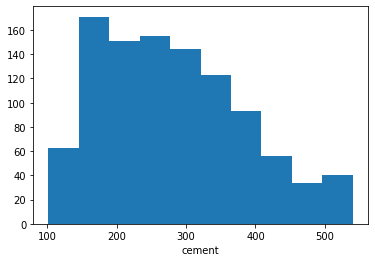

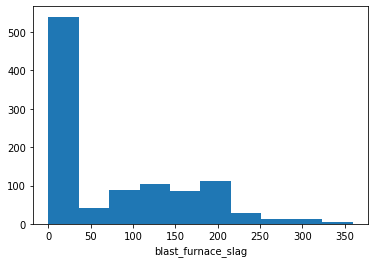

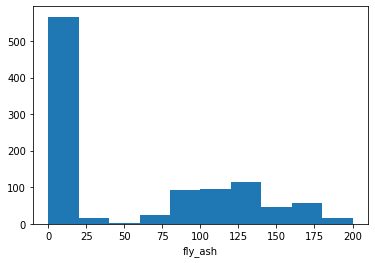

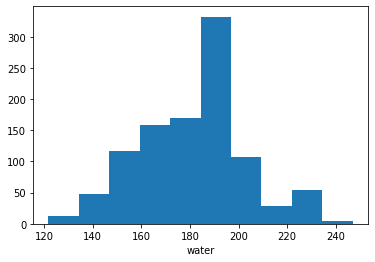

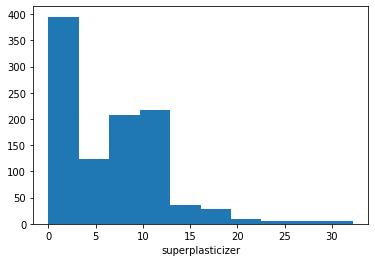

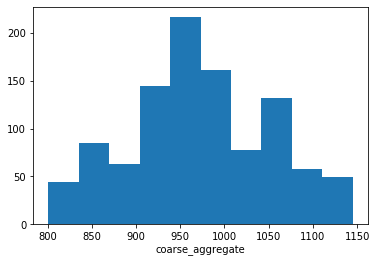

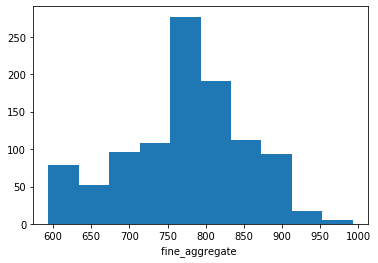

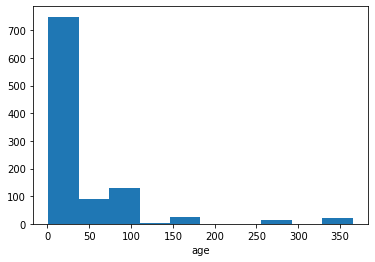

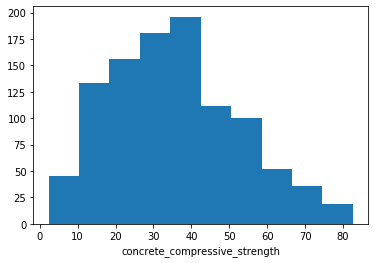

In [15]:
for x in col_data:
    plt.hist(my_data[x])
    plt.xlabel(x)
    plt.show()


## Bivariate Analysis

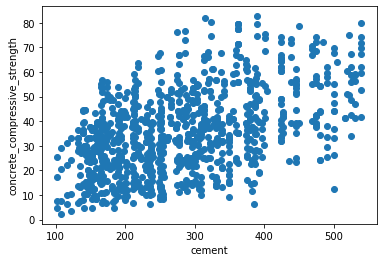

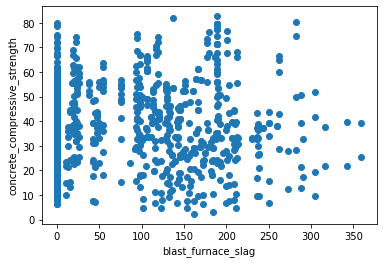

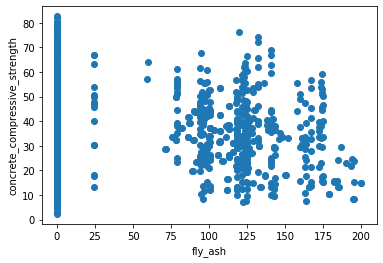

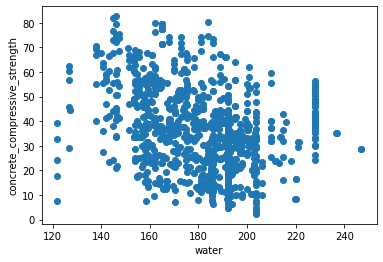

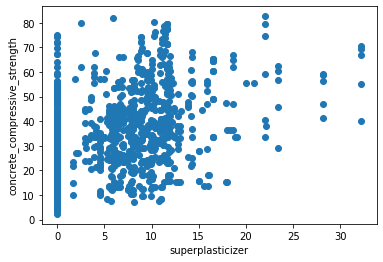

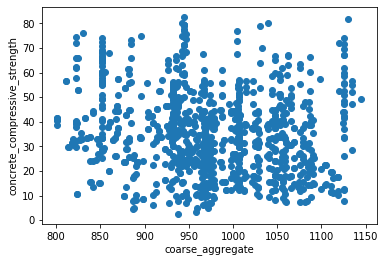

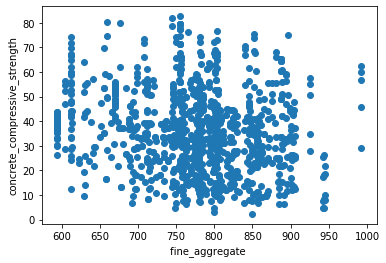

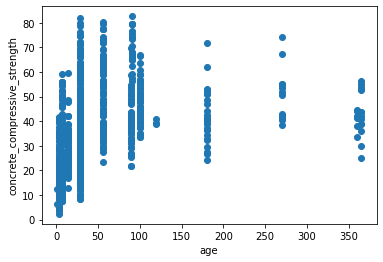

In [16]:
for x in col_data[:8]:
    plt.scatter(my_data[x],my_data["concrete_compressive_strength"])
    plt.xlabel(x)
    plt.ylabel("concrete_compressive_strength")
    plt.show()


## Box Plot:

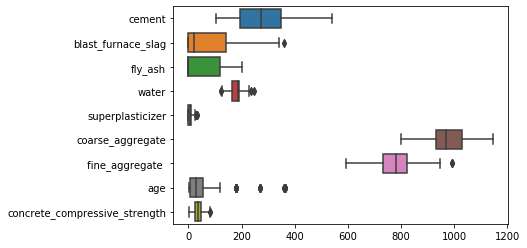

In [17]:
sns.boxplot(data = my_data,width=0.8,orient="h") 

In [18]:
X=my_data.drop(['concrete_compressive_strength'],axis=1)

In [19]:
#important of feature
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [20]:
y=my_data["concrete_compressive_strength"]

In [21]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64

## Feature Importance:

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [23]:
selection.feature_importances_

array([0.24945017, 0.08423318, 0.04106373, 0.09155037, 0.09412873,
       0.03192545, 0.04516701, 0.36248136])

In [24]:
importance_values=(selection.feature_importances_)*100
col_names_data=X.columns


In [25]:
col_names_data

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age'],
      dtype='object')

In [26]:
importance_values

array([24.94501677,  8.42331804,  4.10637295,  9.15503663,  9.41287324,
        3.19254544,  4.51670104, 36.24813589])

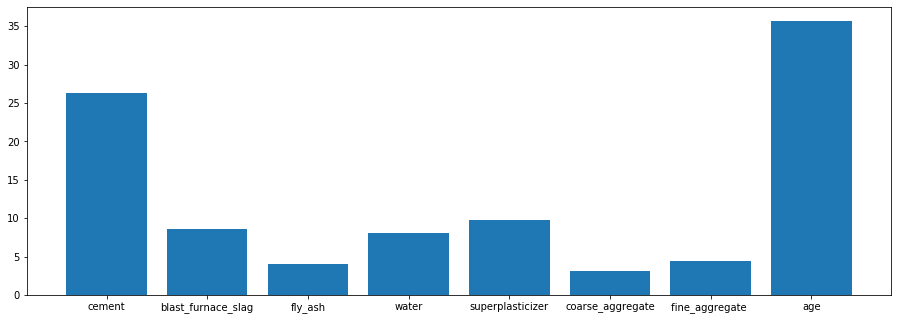

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
col1=['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age']
col2=[26.27097514,  8.52657896,  3.98846297,  8.09916696,  9.81645574,
        3.12761999,  4.45023623, 35.72050401]
ax.bar(col1,col2)
plt.show()

## Heat Map:

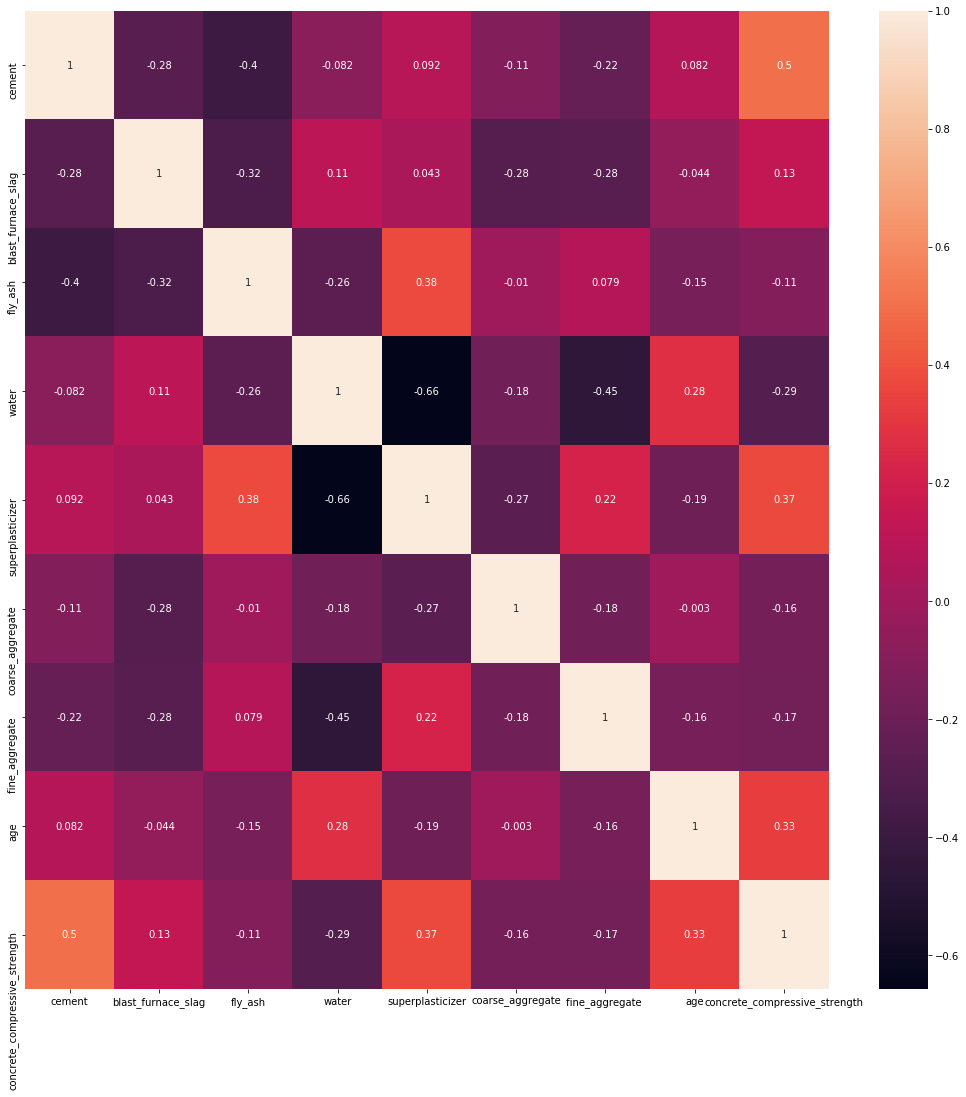

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(my_data.corr(),annot=True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 30)

In [30]:
X_train.shape

(721, 8)

In [31]:
X_test.shape

(309, 8)

In [32]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=25,criterion='mse',random_state=50)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=25, random_state=50)

In [33]:
model.score(X_train,y_train)

0.9792079884840821

In [34]:
model.score(X_test,y_test)

0.900717921490479

In [35]:
import pickle


In [36]:
filename = 'cement_model.pkl'
pickle.dump(model, open(filename, 'wb'))